<a href="https://colab.research.google.com/github/tusharkanta/ML_DL/blob/eva/S9/S9_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
%matplotlib inline
from google.colab import files
#src = list(files.upload().values())[0]
#open('dataloader11.py','wb').write(src)
import dataloader11 as dl
#src = list(files.upload().values())[0]
#open('plotimagefinal.py','wb').write(src)
#import dataloader
import plotimagefinal as pimage
#src = list(files.upload().values())[0]
#open('modeldefresnetfinal.py','wb').write(src)
import modeldefresnetfinal as modeldef
import torch
#src = list(files.upload().values())[0]
#open('modeltraintestdef.py','wb').write(src)
import modeltraintestdef as modeltrt
#src = list(files.upload().values())[0]
#open('utils.py','wb').write(src)
import utils as utils
#src = list(files.upload().values())[0]
#open('gradcamfl.py','wb').write(src)
import gradcamfl as gcm
src = list(files.upload().values())[0]
open('gradcamresult5.py','wb').write(src)
import gradcamresult5 as gcr
import os

Saving gradcamresult5.py to gradcamresult5.py


In [2]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-f39z49qk
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-f39z49qk
     |████████████████████████████████| 634kB 7.1MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=daad8a772225e50db763ad1d8d94e7e71ef2f639ba99c25f8afe214b7a3e5040
  Stored in directory: /tmp/pip-ephem-wheel-cache-9yyilptn/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=2e057c704162935d4cdcaddb2875120c0a863afe47508c2aa0e00af9dfa62db5
  Stored in directory: /tmp/pip-ephem-wheel-cache-9yyilptn/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: album

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified

Total dataset(train+test) shape:  (60000, 32, 32, 3)
mean0 0.49186864
mean1 0.48265335
mean2 0.44717798
std0 0.24697131
std1 0.24338901
std2 0.26159254
channel mean 0.47390000025431317
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Total dataset(train+test) shape:  (60000, 32, 32, 3)
meandata[0]: 0.49186864
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


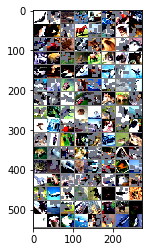

In [3]:
train_loader,test_loader,classes=dl.load_data()
pimage.show_random_images(train_loader,classes)

In [4]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = modeldef.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [5]:
import torch.optim as optim
#model =  modeldef.net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.008, momentum=0.9)
EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    modeltrt.train(model, device, train_loader, optimizer, epoch)
    modeltrt.test(model, device, test_loader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 1.3213, Accuracy: 5223/10000 (52.23%)

EPOCH: 1


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 1.0934, Accuracy: 6297/10000 (62.97%)

EPOCH: 2


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.9330, Accuracy: 6759/10000 (67.59%)

EPOCH: 3


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.8705, Accuracy: 6998/10000 (69.98%)

EPOCH: 4


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.7784, Accuracy: 7340/10000 (73.40%)

EPOCH: 5


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.7020, Accuracy: 7604/10000 (76.04%)

EPOCH: 6


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.6783, Accuracy: 7668/10000 (76.68%)

EPOCH: 7


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.5862, Accuracy: 8011/10000 (80.11%)

EPOCH: 8


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.5998, Accuracy: 7991/10000 (79.91%)

EPOCH: 9


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.5432, Accuracy: 8128/10000 (81.28%)

EPOCH: 10


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4950, Accuracy: 8333/10000 (83.33%)

EPOCH: 11


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4929, Accuracy: 8349/10000 (83.49%)

EPOCH: 12


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.5180, Accuracy: 8225/10000 (82.25%)

EPOCH: 13


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.5252, Accuracy: 8307/10000 (83.07%)

EPOCH: 14


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4986, Accuracy: 8349/10000 (83.49%)

EPOCH: 15


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4688, Accuracy: 8474/10000 (84.74%)

EPOCH: 16


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4116, Accuracy: 8641/10000 (86.41%)

EPOCH: 17


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4318, Accuracy: 8538/10000 (85.38%)

EPOCH: 18


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4279, Accuracy: 8577/10000 (85.77%)

EPOCH: 19


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4005, Accuracy: 8692/10000 (86.92%)

EPOCH: 20


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4289, Accuracy: 8663/10000 (86.63%)

EPOCH: 21


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.3950, Accuracy: 8705/10000 (87.05%)

EPOCH: 22


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4215, Accuracy: 8624/10000 (86.24%)

EPOCH: 23


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.3879, Accuracy: 8750/10000 (87.50%)

EPOCH: 24


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4088, Accuracy: 8668/10000 (86.68%)

EPOCH: 25


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4348, Accuracy: 8646/10000 (86.46%)

EPOCH: 26


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4309, Accuracy: 8612/10000 (86.12%)

EPOCH: 27


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.3764, Accuracy: 8779/10000 (87.79%)

EPOCH: 28


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Avg loss: 0.4329, Accuracy: 8690/10000 (86.90%)

EPOCH: 29


Loss=0.4926651120185852 Accuracy=85.23: 100%|██████████| 391/391 [01:03<00:00,  6.99it/s]



Test set: Avg loss: 0.3840, Accuracy: 8756/10000 (87.56%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    dog horse   car  deer


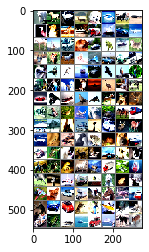

In [8]:

#Okay, first step. Let us display an image from the test set to get familiar. Consider only 4 images from a batch
images=utils.prtgroundtruth(test_loader,classes)


In [9]:
#Get the index of the highest energy (accuracy of those 4 images)
utils.getTestAccuracy(model,images,classes,test_loader,device)

Predicted:    dog horse   car  deer
Accuracy of the network on the 10000 test images: 87 %


In [10]:
# 
# what are the classes that performed well, and the classes that did not perform well:
utils.getclassaccuracy(model,test_loader,classes,device)

Accuracy of plane : 83 %
Accuracy of   car : 100 %
Accuracy of  bird : 94 %
Accuracy of   cat : 79 %
Accuracy of  deer : 75 %
Accuracy of   dog : 80 %
Accuracy of  frog : 96 %
Accuracy of horse : 91 %
Accuracy of  ship : 100 %
Accuracy of truck : 93 %


/content/testimagedummy


Saving dog5.png to dog5 (5).png
image_Path /content/testimagedummy/dog5.png
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
image_Path /content/testimagedummy/dog5.png
/content/testimagedummy/outputs/dog5.png


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


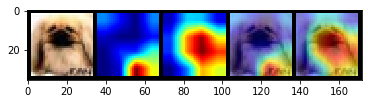

In [25]:

img_dir = '/content/testimagedummy'
# img_name = 'collies.JPG'
# img_name = 'multiple_dogs.jpg'
# img_name = 'snake.JPEG'
os.makedirs(img_dir, exist_ok=True)
%cd '/content/testimagedummy' 
from google.colab import files
src = list(files.upload().values())[0]
open('dog5.png','wb').write(src)
img_name = 'dog5.png'
img_path = os.path.join(img_dir, img_name)
print("image_Path",img_path)
gcr.get_gradcam_op (model,'layer4')
